In [188]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime,timedelta
from countryinfo import CountryInfo # we can get the information anout country from this (population, coordinates, etc)


import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [ ]:
# getting data from John Hopkins observatory is providing a github repository with all recent data: 
# https://github.com/CSSEGISandData/COVID-19.git

In [91]:
giturl_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
giturl_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
giturl_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

In [92]:
covid_id='Confirmed'

In [93]:
if covid_id=='Confirmed':
    curl = giturl_confirmed
elif covid_id =='Deaths':
    curl = giturl_deaths
elif covid_id =='Recovered':
    curl = giturl_recovered

In [94]:
corona_cases_df = pd.read_csv(curl)  #   use first four columns as multiindex

In [95]:
print(corona_cases_df.shape)
print(corona_cases_df.columns.values)


(487, 65)
['Province/State' 'Country/Region' 'Lat' 'Long' '1/22/20' '1/23/20'
 '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20' '1/29/20' '1/30/20'
 '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20' '2/5/20' '2/6/20' '2/7/20'
 '2/8/20' '2/9/20' '2/10/20' '2/11/20' '2/12/20' '2/13/20' '2/14/20'
 '2/15/20' '2/16/20' '2/17/20' '2/18/20' '2/19/20' '2/20/20' '2/21/20'
 '2/22/20' '2/23/20' '2/24/20' '2/25/20' '2/26/20' '2/27/20' '2/28/20'
 '2/29/20' '3/1/20' '3/2/20' '3/3/20' '3/4/20' '3/5/20' '3/6/20' '3/7/20'
 '3/8/20' '3/9/20' '3/10/20' '3/11/20' '3/12/20' '3/13/20' '3/14/20'
 '3/15/20' '3/16/20' '3/17/20' '3/18/20' '3/19/20' '3/20/20' '3/21/20'
 '3/22/20']


In [96]:
corona_cases_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [97]:
corona_cases_df = pd.read_csv(curl, index_col=[0,1,2,3])  #   use first four columns as multiindex
#corona_cases_df.columns.values[4:]

In [98]:
#countries = ['China', 'Canada', 'India']
datesformat = [datetime.strptime(da, '%m/%d/%y') for da in corona_cases_df.columns.values[4:]]
daterange = pd.DatetimeIndex(datesformat)

In [99]:
print(daterange)

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
      

In [100]:
country_official_list = (corona_cases_df.index.get_level_values('Country/Region').values)
print(country_official_list)

['Thailand' 'Japan' 'Singapore' 'Nepal' 'Malaysia' 'Canada' 'Australia'
 'Australia' 'Australia' 'Cambodia' 'Sri Lanka' 'Germany' 'Finland'
 'United Arab Emirates' 'Philippines' 'India' 'Italy' 'Sweden' 'Spain'
 'Australia' 'Belgium' 'Egypt' 'Australia' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Algeria' 'Croatia' 'Switzerland'
 'Austria' 'Israel' 'Pakistan' 'Brazil' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Estonia' 'San Marino' 'Belarus'
 'Iceland' 'Lithuania' 'Mexico' 'New Zealand' 'Nigeria' 'Australia'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan' 'Armenia'
 'Dominican Republic' 'Indonesia' 'Portugal' 'Andorra' 'Australia'
 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile' 'Jordan'
 'Ukraine' 'Hungary' 'Australia' 'Liechtenstein' 'Poland' 'Tunisia'
 'Bosnia and Herzegovina' 'Slovenia' 'South Africa' 'Bhutan' 'Cameroon'
 'Colombia' 'Costa Rica' 'Peru' 'Serbia' 'Slovakia' 'Togo' 'Malta'
 'Martinique' 'Bulgaria' 'Maldives

In [154]:
wanted_countries = ['Canada', 'India','China', 'US']

country_list = (corona_cases_df.index.get_level_values('Country/Region').values)
countries_list = [np.unique(np.array([s for s in country_list if cou in s])) for cou in wanted_countries]
countries_list = np.array(countries_list).flatten()
print((countries_list))

['Canada' 'India' 'China' 'US']


In [155]:
'''for cou in wanted_countries:
    for s in country_list:
        if cou in s:
            print(cou)'''

'for cou in wanted_countries:\n    for s in country_list:\n        if cou in s:\n            print(cou)'

In [156]:
countries_list[0]

'Canada'

In [157]:
# getting all for canada
corona_cases_df.loc[pd.IndexSlice[:, 'Canada'], :]

,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Province/State,Country/Region,Lat,Long,,,,,,,,,,,,,,,,,,,,,
British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,1,1,1,1,...,64,64,73,103,103,186,231,271,424,424
Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,1,1,1,3,...,74,79,104,177,185,221,257,308,377,425
Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,0,0,0,0,...,29,29,39,56,74,97,119,146,195,259
Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,0,0,0,0,...,17,17,24,50,74,94,121,139,181,219
New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,0,0,0,0,...,1,1,2,6,8,11,11,11,17,17
Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,0,0,0,0,...,4,4,4,7,8,15,17,17,18,19
Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,0,0,0,0,...,2,2,2,7,7,8,16,20,26,52
Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,8,9,9,10,10,13
Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,3,3,3,4,6,6


In [158]:
print('                                              INDEX SLICE (EXAMPLE)')
midx = pd.MultiIndex.from_product([['A0','A1'], ['B0','B1','B2','B3']])
columns = ['foo', 'bar']
dfmi = pd.DataFrame(np.arange(16).reshape((len(midx), len(columns))),
                        index=midx, columns=columns)
print('raw data')
print(dfmi)

idx = pd.IndexSlice
print('')
print('Example of Index slice')
print(dfmi.loc[idx[:, 'B0':'B1'], :])

                                              INDEX SLICE (EXAMPLE)
raw data
       foo  bar
A0 B0    0    1
   B1    2    3
   B2    4    5
   B3    6    7
A1 B0    8    9
   B1   10   11
   B2   12   13
   B3   14   15

Example of Index slice
       foo  bar
A0 B0    0    1
   B1    2    3
A1 B0    8    9
   B1   10   11


In [159]:
cases_percountry = {}
df_dict = {}
for country in countries_list:
    
    # CHECK THE INDEX SLICE EXAMPLE ABOVE. WE ARE DOIGN THIS TO GET ALL THE DATA FOR THE COUNTRY WE ARE LOOKING FOR
    # we are doing sum for the total number of cases in a country, eg: in canada we have 12 rows for wach province
    # but we want to see for whole canada
    cou = corona_cases_df.loc[pd.IndexSlice[:, country], :].sum()
    
    # getting rid of the record which has zero cases
    cases_percountry[country] = cou[cou > 0]
    datesformat = [datetime.strptime(da, '%m/%d/%y') for da in cases_percountry[country].index]
    df_dict[country] = pd.DataFrame(cases_percountry[country], columns=['Cases'], index=datesformat)
    df_dict[country]['DayCount'] = np.arange(1,cases_percountry[country].shape[0]+1)
#df_dict has country -> date, cases: # cases that day, DayCount

In [160]:
# there is asome manual fix of data followed online.. some numbers were not correct
# copied from the link mentioned above

confirmed_fixes_dict = {'Italy|2020-03-12': 15113,
                        'Spain|2020-03-12': 3146,
                        'France|2020-03-12': 2876,
                        'United Kingdom|2020-03-12': 590,
                        'Germany|2020-03-12': 2745,
                        'Argentina|2020-03-12': 19,
                        'Australia|2020-03-12': 122,
                        'Belgium|2020-03-12': 314,
                        'Chile|2020-03-12': 23,
                        'Colombia|2020-03-12': 9,
                        'Greece|2020-03-12': 98,
                        'Indonesia|2020-03-12': 34,
                        'Ireland|2020-03-12': 43,
                        'Japan|2020-03-12': 620,
                        'Netherlands|2020-03-12': 503,
                        'Qatar|2020-03-12': 262,
                        'Singapore|2020-03-12': 178,
                        'France|2020-03-15': 5423,}
                        
deaths_fixes_dict = {'Italy|2020-03-12': 1016,
                     'Spain|2020-03-12': 86,
                     'France|2020-03-12': 61,
                     'United Kingdom|2020-03-12': 10,
                     'Germany|2020-03-12': 6,
                     'Argentina|2020-03-12': 1,
                     'Australia|2020-03-12': 3,
                     'Greece|2020-03-12': 1,
                     'Indonesia|2020-03-12': 1,
                     'Ireland|2020-03-12': 1,
                     'Japan|2020-03-12': 15,
                     'Netherlands|2020-03-12': 5,
                     'Switzerland|2020-03-12': 4,
                     'United Kingdom|2020-03-15': 35,
                     'France|2020-03-15': 127}
                     
recovered_fixes_dict = {'Italy|2020-03-12': 1258,
                        'Spain|2020-03-12': 189,
                        'France|2020-03-12': 12,
                        'Germany|2020-03-12': 25}

In [161]:
print(covid_id)
if covid_id=='Confirmed':
    fixes_dict = confirmed_fixes_dict
    print(fixes_dict)
    
elif covid_id =='Deaths':
    fixes_dict = deaths_fixes_dict

elif covid_id =='Recovered':
    fixes_dict = recovered_fixes_dict   

# fixing the confirmed cases
for key in fixes_dict.keys():
        country_to_be_fixed = key.split('|')[0]
        if country_to_be_fixed in df_dict.keys():
            date_to_be_fixed = key.split('|')[1]
            value_to_be_fixed = fixes_dict[key]
            df_dict[country_to_be_fixed]['Cases'].loc[date_to_be_fixed] = value_to_be_fixed

Confirmed
{'Italy|2020-03-12': 15113, 'Spain|2020-03-12': 3146, 'France|2020-03-12': 2876, 'United Kingdom|2020-03-12': 590, 'Germany|2020-03-12': 2745, 'Argentina|2020-03-12': 19, 'Australia|2020-03-12': 122, 'Belgium|2020-03-12': 314, 'Chile|2020-03-12': 23, 'Colombia|2020-03-12': 9, 'Greece|2020-03-12': 98, 'Indonesia|2020-03-12': 34, 'Ireland|2020-03-12': 43, 'Japan|2020-03-12': 620, 'Netherlands|2020-03-12': 503, 'Qatar|2020-03-12': 262, 'Singapore|2020-03-12': 178, 'France|2020-03-15': 5423}


In [162]:
#print(df_dict.keys())
#print(df_dict)
print(df_dict.Index())
#print(df_dict['Canada']['Cases'].values)

AttributeError: 'dict' object has no attribute 'Index'

In [163]:
countries_list

array(['Canada', 'India', 'China', 'US'], dtype='<U6')

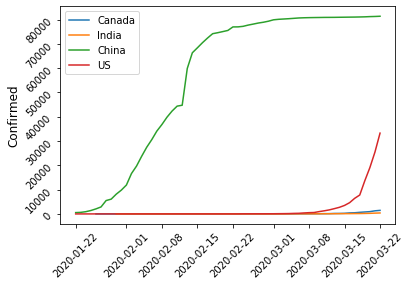

In [164]:
for country in countries_list:
    dates_count = df_dict[country].index.values
    plt.plot(dates_count, np.array(df_dict[country].Cases.values), label = country)
    plt.legend()
    plt.tick_params(rotation= 45)
    plt.ylabel(covid_id, fontsize = 12)

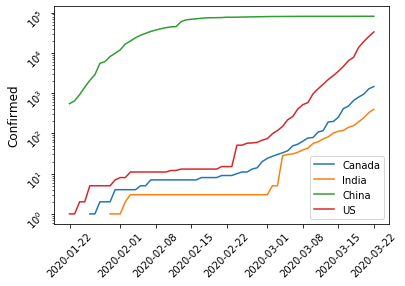

In [165]:
for country in countries_list:
    dates_count = df_dict[country].index.values
    plt.semilogy(dates_count, np.array(df_dict[country].Cases.values), label = country)
    plt.legend()
    plt.tick_params(rotation= 45)
    plt.ylabel(covid_id, fontsize = 12)

In [166]:
# the models that I will be working on
# Logistic: https://en.wikipedia.org/wiki/Logistic_function
# gomperts = https://en.wikipedia.org/wiki/Gompertz_function
# exponential function


In [186]:
def mod_logistic(x,l,k,x_0):
    return l/(1+np.exp(-k*(x-x_0)))

def mod_gompertz(x,a,b,c):
    return(a*np.exp(-b*np.exp(-c*x))) 

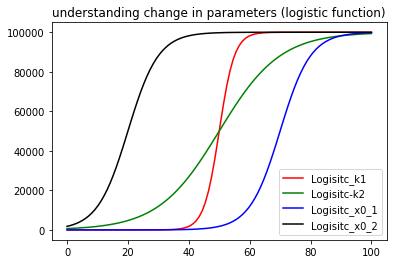

In [201]:
# leaning more about logistic function
# how to control parameters
plt.title('understanding change in parameters (logistic function)')
plt.plot(tt, mod_logistic(tt,100000,0.4,50), c='r', label='Logisitc_k1')
plt.plot(tt, mod_logistic(tt,100000,0.1,50), c='g', label='Logisitc-k2')
plt.plot(tt, mod_logistic(tt,100000,0.2,70), c='b', label='Logisitc_x0_1')
plt.plot(tt, mod_logistic(tt,100000,0.2,20), c='k', label='Logisitc_x0_2')
plt.legend()


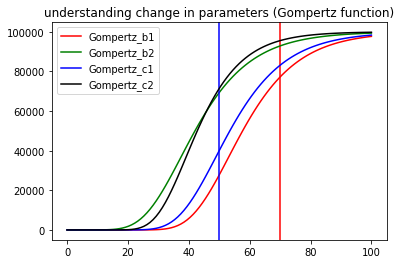

In [204]:
plt.title('understanding change in parameters (Gompertz function)')
plt.plot(tt, mod_gompertz(tt, 100000, 70, 0.08), c='r', label='Gompertz_b1')
plt.axvline(x=70, c='r')
plt.plot(tt, mod_gompertz(tt, 100000, 20, 0.08), c='g', label='Gompertz_b2')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 0.08), c='b', label='Gompertz_c1')
plt.axvline(x=50, c='b')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 0.1), c='k', label='Gompertz_c2')
plt.legend()

(-1000, 150000)

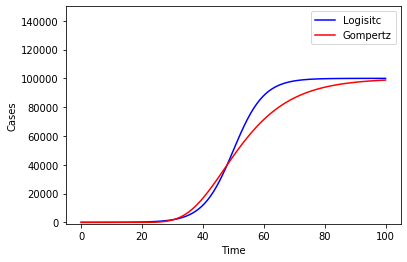

In [196]:
tt= np.linspace(0,100,100)
plt.plot(tt, mod_logistic(tt,100000,0.2,50), c='b', label='Logisitc')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 1/12), c='r', label='Gompertz')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cases')
plt.ylim(-1000,150000)

In [175]:
for i in range(100):
    print(1000/(1+np.exp(-0.2(-50))))

TypeError: 'float' object is not callable

In [177]:
np.exp(-0.2(-50))

0.36787944117144233

In [178]:
np.exp(10)

22026.465794806718

In [180]:
0.2*(-50)

-10.0